# Rigetti

In [1]:
import sys
sys.path.append('../')
from src.analysis.EventStudy import EventStudy
from src.data.data_utils import get_returns, scrape_arxiv
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot

In [2]:
ticker = 'RGTI'
rgti_returns = get_returns(ticker, start_date="2021-01-01", end_date="2025-10-31")
market_returns = get_returns("^GSPC", start_date=rgti_returns.index[0], end_date="2025-10-31")
arxiv_df = scrape_arxiv(query="Quantum AND Rigetti", start_date="2021-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
windows = [i for i in range(36)]

ev_rgti = EventStudy(ticker, market_returns, windows)

In [4]:
ev_rgti.fit_residuals(stock_returns=rgti_returns, window=35, expanding=True)

/Users/williamfriend/anaconda3/envs/qsig/lib/python3.13/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in scalar divide
  s2 = ssr / (nobs - tot_params)


In [5]:
filtered_dates = []
for idx in rgti_returns.index:
        if all(abs(idx - arxiv_df.index) > pd.Timedelta('10d')):
            filtered_dates.append(idx)

results = ev_rgti.event_single_test(event_dates=arxiv_df.index)
mean_random, std_random = ev_rgti.random_single_test(filtered_dates=filtered_dates, n=len(arxiv_df))

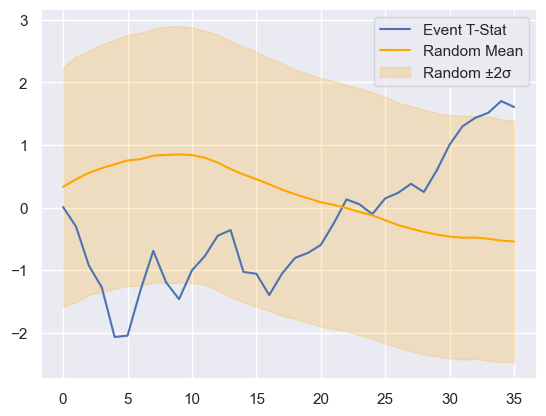

In [6]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.plot(windows, results['t_stat'], label='Event T-Stat')
plt.plot(windows, mean_random, label='Random Mean', color='orange')
plt.fill_between(windows, mean_random - 2*std_random, mean_random + 2*std_random,
                 color='orange', alpha=0.2, label='Random ±2σ')
plt.legend()
plt.show()

In [7]:
mean_two_sample, std_two_sample = ev_rgti.event_two_sample_test(event_dates=arxiv_df.index, filtered_dates=filtered_dates, n=len(arxiv_df))

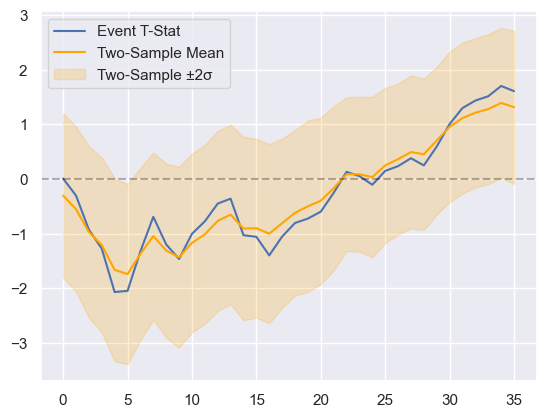

In [8]:
plt.plot(windows, results['t_stat'], label='Event T-Stat')
plt.plot(windows, mean_two_sample, label='Two-Sample Mean', color='orange')
plt.fill_between(windows, mean_two_sample - 2*std_two_sample, mean_two_sample + 2*std_two_sample,
                 color='orange', alpha=0.2, label='Two-Sample ±2σ')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.legend()
plt.show()

# D-Wave

In [9]:
ticker = 'QBTS'
dwave_returns = get_returns(ticker, start_date="2021-01-01", end_date="2025-10-31")
market_returns = get_returns("^GSPC", start_date=dwave_returns.index[0], end_date="2025-10-31")
arxiv_df = scrape_arxiv(query="Quantum AND D-Wave Quantum", start_date="2021-01-01", max_results=500)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
windows = [i for i in range(36)]

ev_dwave = EventStudy(ticker, market_returns, windows)

In [11]:
ev_dwave.fit_residuals(stock_returns=dwave_returns, window=35, expanding=True)

/Users/williamfriend/anaconda3/envs/qsig/lib/python3.13/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in scalar divide
  s2 = ssr / (nobs - tot_params)


In [12]:
filtered_dates = []
for idx in dwave_returns.index:
        if all(abs(idx - arxiv_df.index) > pd.Timedelta('10d')):
            filtered_dates.append(idx)

results = ev_dwave.event_single_test(event_dates=arxiv_df.index)
mean_random, std_random = ev_dwave.random_single_test(filtered_dates=filtered_dates, n=len(arxiv_df))

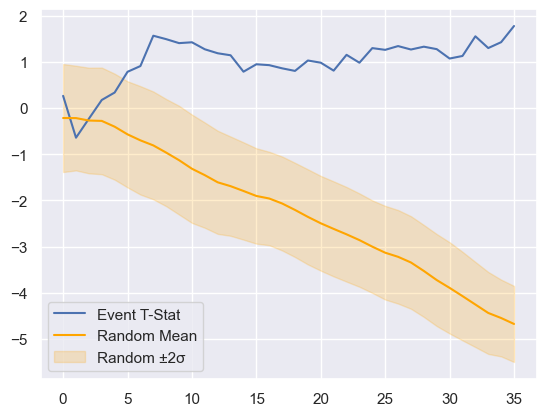

In [13]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.plot(windows, results['t_stat'], label='Event T-Stat')
plt.plot(windows, mean_random, label='Random Mean', color='orange')
plt.fill_between(windows, mean_random - 2*std_random, mean_random + 2*std_random,
                 color='orange', alpha=0.2, label='Random ±2σ')
plt.legend()
plt.show()

In [14]:
mean_two_sample, std_two_sample = ev_dwave.event_two_sample_test(event_dates=arxiv_df.index, filtered_dates=filtered_dates, n=len(arxiv_df))

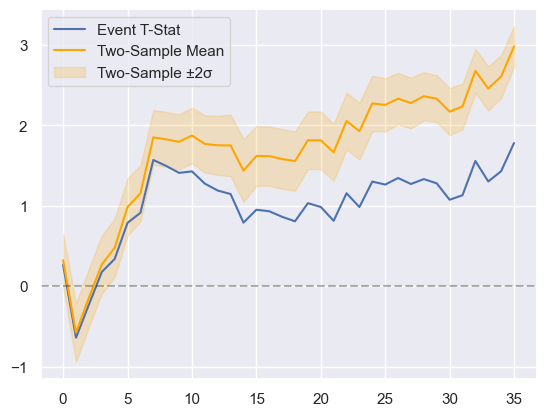

In [15]:
plt.plot(windows, results['t_stat'], label='Event T-Stat')
plt.plot(windows, mean_two_sample, label='Two-Sample Mean', color='orange')
plt.fill_between(windows, mean_two_sample - 2*std_two_sample, mean_two_sample + 2*std_two_sample,
                 color='orange', alpha=0.2, label='Two-Sample ±2σ')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.legend()
plt.show()

<Axes: xlabel='Date'>

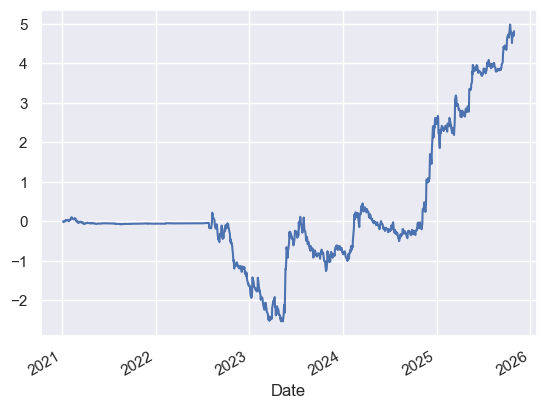

In [16]:
dwave_returns.cumsum().plot()

453